# Assessment Problems

Python project that downloads FAANG stock data, plots it, automates execution via a script, and schedules it weekly with GitHub Actions.

Author: Carmine Giardino

In [6]:
# Importing libraries

# Dates and times
import datetime as dt

# Data frames
import pandas as pd

# File system operations
import os

#  Yahoo Finance yfinance module to fetch stock data
import yfinance as yf

# File system operations
import glob

# Matplotlib for plotting
import matplotlib.pyplot as plt

## Problem 1: Data from yFinance

Function `get_data()` uses [yfinance](https://github.com/ranaroussi/yfinance) Python package to:

1. Download hourly stock data for the past 5 days for FAANG (META, AAPL, AMZN, NFLX, GOOG).

2. Save results as a CSV in a data/ folder (create it if missing).

The filename format is `YYYYMMDD-HHmmss.csv` (date and time of save).

In [7]:
def get_data():
    # FAANG tickers
    tickers = ["META", "AAPL", "AMZN", "NFLX", "GOOG"]
    # Download data for the past 5 days for FAANG
    # https://ranaroussi.github.io/yfinance#ticker
    data = yf.download(tickers, period="5d", interval="1h", auto_adjust=True)
    # Ensure data/ directory exists
    os.makedirs("data", exist_ok=True)
    # Create filename with the current date and time
    # https://docs.python.org/3/library/datetime.html
    # Getting current date and time for filename with format YYYYMMDD-HHmmss
    # https://docs.python.org/3/library/datetime.html#datetime.datetime.now
    filename = dt.datetime.now().strftime("%Y%m%d-%H%M%S") + ".csv"
    # Creating a full file path (including the filename) for saving the stock data
    filepath = os.path.join("data", filename)
    # Saving the CSV file in the data folder with name as per the specified format
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
    data.to_csv(filepath)
    print(f"Data saved to {filepath}")
    print (data.head())

Saving the fetched stock data to a CSV file  


In [8]:
# Calling the function to download the data and save it as a CSV file
get_data()

[*********************100%***********************]  5 of 5 completed

Data saved to data/20251110-171205.csv
Price                           Close                                      \
Ticker                           AAPL        AMZN        GOOG        META   
Datetime                                                                    
2025-11-04 14:30:00+00:00  268.429993  253.389999  280.269989  635.355774   
2025-11-04 15:30:00+00:00  270.609985  252.440094  279.376099  631.979980   
2025-11-04 16:30:00+00:00  270.010010  250.955002  278.250000  631.544983   
2025-11-04 17:30:00+00:00  270.638397  249.869995  277.450012  629.431702   
2025-11-04 18:30:00+00:00  270.510406  249.750000  278.679993  630.210022   

Price                                         High                          \
Ticker                            NFLX        AAPL        AMZN        GOOG   
Datetime                                                                     
2025-11-04 14:30:00+00:00  1098.313965  269.589996  255.440002  281.075012   
2025-11-04 15:30:00+00:00  1092.

## Problem 2: Plotting Data

Function `plot_data()` loads the latest CSV in the `data` folder, plots `Close` prices for all five FAANG stocks with labels, legend, and date as the title.
Then it saves the plot in a `plots` folder as `YYYYMMDD-HHmmss.png` by creating the folder if it doesn't exist.

In [9]:
# Function to plot data from the latest CSV file
def plot_data():
    # Find the latest CSV in the data folder using glob
    # https://docs.python.org/3/library/glob.html
    csv_files = glob.glob('data/*.csv')
    if not csv_files:
        # If no csv file exists, return
        print("No CSV files found in data/")
        return
    # Get the latest CSV file using os.path.getctime
    # https://www.geeksforgeeks.org/python/python-os-path-getctime-method/
    latest_csv = max(csv_files, key=os.path.getctime)

    # Load the latest CSV into a DataFrame
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
    df = pd.read_csv(latest_csv, header=[0,1], index_col=0, parse_dates=True)

    # Plot Close prices for all available tickers using pandas built-in plotting
    close_prices_df = df['Close']  # This gives a DataFrame with all Close prices for each ticker
    ax = close_prices_df.plot(figsize=(12, 6), grid=True, title="FAANG Close Prices")
    ax.set_xlabel("Time")
    ax.set_ylabel("Close Price")
    plt.legend(title="Ticker")
    # Save plot
    os.makedirs("plots", exist_ok=True)
    out_path = f"plots/{dt.datetime.now().strftime('%Y%m%d-%H%M%S')}.png"
    plt.savefig(out_path)
    plt.show()
    plt.close()

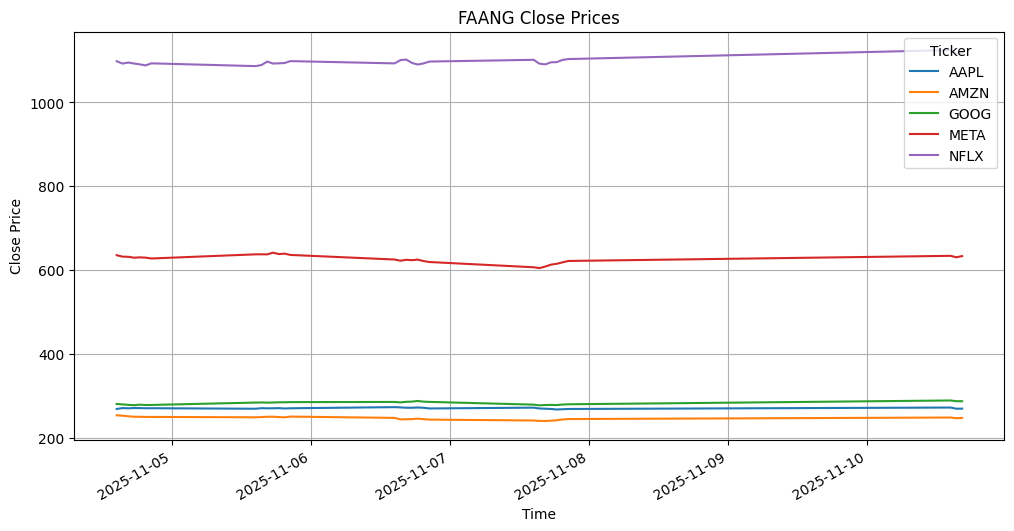

In [10]:
# Calling the function to generate the plot in the plots folder
plot_data()

## Problem 3: Script

Script `faang.py` in the repo root contains the two functions (`get_data()` and `plot_data()`). It can be run by `./faang.py` from the terminal to download the data and generate the plot.

## Problem 4: Automation

GitHub Actions workflow (`faang.yml`) inside `.github/workflows/` runs `faang.py` every Saturday morning.

## End